In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

cluster_df = pd.read_csv('../datasets/Zenodo/v1/train_ams_real_cluster.csv.gz')

ams_df = pd.read_csv('../datasets/Zenodo/v1/ams_order_results.csv.gz')
train_df = pd.read_csv('../datasets/Zenodo/v1/training_df_single_fold.csv.gz')

real_df = pd.read_csv('../datasets/enamine_results/pria_enamine_inhib.csv').drop_duplicates('SMSSF Molecule ID')
real_cpd_info_df = pd.read_csv('../datasets/Zenodo/v1/enamine_final_list_v2.csv.gz').drop('Hit', axis=1)
real_df = real_df.merge(real_cpd_info_df, on='ID Enamine')

In [2]:
train_hits = train_df[train_df['PriA-SSB AS Activity'] == 1]
ams_hits = ams_df[ams_df['Hit'] == 1]
real_hits = real_df[real_df['Hit'] == 1]

train_hits_inhib = train_hits['PriA-SSB AS % inhibition (Primary Median)'].values # median of primary at 33 uM since not all cpds have retest 
ams_hits_inhib = ams_hits[['Replicate1', 'Replicate2']].mean(axis=1).values # mean/median of replicate 1 and 2 at 33 uM
real_hits_inhib = real_hits['% Inhibition'].values # mean/median of quadruplicates at 33 uM

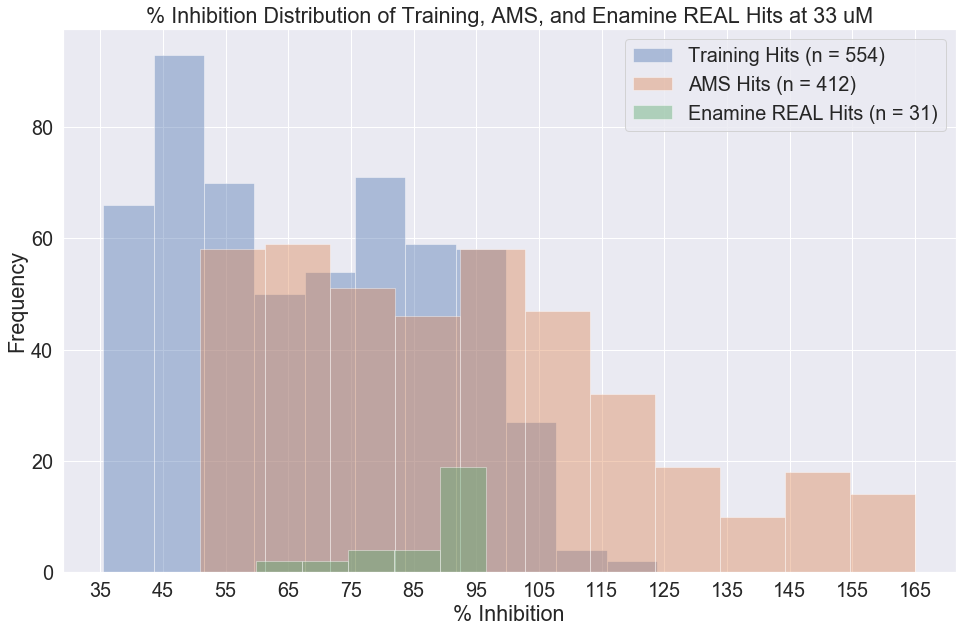

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("paper");sns.set(font_scale=1.8);figsize=(16, 10)

bin_range= np.linspace(35, 170, 30)
plt.figure(figsize=figsize)

sns.distplot(train_hits_inhib, norm_hist=False, kde=False)#, color='maroon', bins=bin_range)
sns.distplot(ams_hits_inhib, norm_hist=False, kde=False)
sns.distplot(real_hits_inhib, norm_hist=False, kde=False)
plt.title('% Inhibition Distribution of Training, AMS, and Enamine REAL Hits at 33 uM')
plt.xlabel('% Inhibition'); plt.ylabel('Frequency');
plt.xticks([int(i) for i in np.linspace(35, 165, 14)])
plt.legend(['Training Hits (n = {})'.format(train_hits_inhib.shape[0]), 
            'AMS Hits (n = {})'.format(ams_hits_inhib.shape[0]), 
            'Enamine REAL Hits (n = {})'.format(real_hits_inhib.shape[0])])
plt.show()

In [70]:
ams_df = pd.read_csv('../datasets/Zenodo/v1/ams_order_results.csv.gz')
train_df = pd.read_csv('../datasets/Zenodo/v1/training_df_single_fold.csv.gz')

real_df = pd.read_csv('../datasets/enamine_results/pria_enamine_inhib.csv').drop_duplicates('SMSSF Molecule ID')
real_cpd_info_df = pd.read_csv('../datasets/Zenodo/v1/enamine_final_list_v2.csv.gz').drop('Hit', axis=1)
real_df = real_df.merge(real_cpd_info_df, on='ID Enamine')

train_hits = train_df[train_df['PriA-SSB AS Activity'] == 1]
ams_hits = ams_df[ams_df['Hit'] == 1]
real_hits = real_df[real_df['Hit'] == 1]

####
cols = ['dataset', 'SMSSF ID', 'rdkit SMILES', '1024 MorganFP Radius 2', 'PAINS Filter', 'Hit', '% Inhibition', 'Selection']
train_hits['% Inhibition'] = train_hits['PriA-SSB AS % inhibition (Primary Median)']
train_hits['Hit'] = train_hits['PriA-SSB AS Activity'] 
train_hits['dataset'] = 'MLPCN/train'
train_hits['Selection'] = np.nan
train_hits = train_hits[cols]
 
ams_hits['% Inhibition'] = ams_hits[['Replicate1', 'Replicate2']].mean(axis=1).values
ams_hits['SMSSF ID'] = ams_hits['CNC_ID']
ams_hits['dataset'] = 'ams'
ams_hits['Selection'] = ams_hits['Selection'].apply(lambda x: 'RF' if x == 'Prediction' else x)
ams_hits = ams_hits[cols]

real_hits['SMSSF ID'] = real_hits['SMSSF Molecule ID']
real_hits['dataset'] = 'enamine'
real_hits['Selection'] = 'RF'
real_hits = real_hits[cols]

df = pd.concat([train_hits, ams_hits, real_hits])
df.to_csv('../datasets/enamine_results/all_datasets_hits.csv.gz', index=False)

In [71]:
df = pd.read_csv('../datasets/enamine_results/all_datasets_hits.csv.gz')

df[['dataset', 'Hit']].groupby('dataset').sum()

,Hit
dataset,
MLPCN/train,554.0
ams,412.0
enamine,31.0


In [72]:
df['Hit'].sum()

997.0

In [73]:
df

,dataset,SMSSF ID,rdkit SMILES,1024 MorganFP Radius 2,PAINS Filter,Hit,% Inhibition,Selection
0,MLPCN/train,SMSSF-0548080,COc1ccccc1NC(=O)NCCn1ccnc1-c1ncccn1,1000000000000000000000000000000001000000000000...,1.0,1.0,39.039176,NaN
1,MLPCN/train,SMSSF-0548079,O=C(NCCn1ccnc1-c1ncccn1)NCc1cccs1,1000000000000010000000000000000000001000000000...,1.0,1.0,71.333096,NaN
2,MLPCN/train,SMSSF-0548077,O=C(NCCn1ccnc1-c1ncccn1)Nc1cccs1,1000000000000010000000000000000000000000000000...,1.0,1.0,123.843396,NaN
3,MLPCN/train,SMSSF-0548073,O=S(=O)(NCCn1ccnc1-c1ncccn1)c1ccc(Cl)s1,1000000000000000000000000000000000000000001000...,1.0,1.0,43.633599,NaN
4,MLPCN/train,SMSSF-0548068,Cc1ccc(N2CC(C(=O)NCCn3ccnc3-c3ncccn3)CC2=O)cc1C,1000000000000000000000000000000001000000000000...,1.0,1.0,43.231648,NaN
5,MLPCN/train,SMSSF-0548067,O=C(NCCn1ccnc1-c1ncccn1)C1(c2ccccc2)CCOCC1,1000000000000000000000010000000000001000000000...,1.0,1.0,40.214432,NaN
6,MLPCN/train,SMSSF-0548065,O=C(Cn1c(=O)oc2ccccc21)NCCn1ccnc1-c1ncccn1,1000000000000000000000000000000000000000010001...,1.0,1.0,99.477288,NaN
7,MLPCN/train,SMSSF-0548062,O=C(CSCc1ccccc1)NCCn1ccnc1-c1ncccn1,1000000000000000000100000000000000000000011000...,1.0,1.0,41.610706,NaN
8,MLPCN/train,SMSSF-0540931,O=C(NCCOc1ccc(-c2ccccn2)nn1)c1ccccc1C(F)(F)F,0100000010000100000000000000000000000000000000...,1.0,1.0,94.690098,NaN
9,MLPCN/train,SMSSF-0538343,CCOc1ccccc1NC(=O)CN1CCN(c2nccn2-c2cccc(Cl)c2)CC1,0000000000000001000000001100000001000000010000...,1.0,1.0,59.138726,NaN
